**Summary**

The results for the optimized models are as follows:

**Confusion Matrix Metrics**

Logistic Regression - Accuracy:=0.92958, Sensitivity:=0.81818, Specificity:=0.97959, Precision:=0.94737
Support Vector Machine - Accuracy:=0.98592, Sensitivity:=1.00000, Specificity:=0.97959, Precision:=0.95652
Decision Tree - Accuracy:=0.95775, Sensitivity:=0.86364, Specificity:=1.00000, Precision:=1.00000
AdaBoost ensemble - Accuracy:=0.95775, Sensitivity:=0.86364, Specificity:=1.00000, Precision:=1.00000
Multi-Layer Perceptron - Accuracy:=0.98592, Sensitivity:=0.95455, Specificity:=1.00000, Precision:=1.00000

**Cross Validated Accuracy**

Logistic Regression - Cross Validated Accuracy:= 0.91667 +/- 0.09044
Support Vector Machine - Cross Validated Accuracy:= 0.92778 +/- 0.07049
Decision Tree - Cross Validated Accuracy:= 0.91667 +/- 0.10015
AdaBoost ensemble - Cross Validated Accuracy:= 0.92222 +/- 0.10000
Multi-Layer Perceptron - Cross Validated Accuracy:= 0.95556 +/- 0.05443
Logistic Regression performed worst overall, having the lowest scores on all confusion matrix metrics and a cross-validated accuracy that was joint worst with the Decision Tree.

The Decision Tree and the AdaBoost ensemble performed identically. This makes sense given that the AdaBoost ensemble uses Decision Trees as base classifiers.

The SVM achieved the joint highest test accuracy and out-performed the Logistic Regression model on all scores, except for tying with Specificity.

The MLP was more specific and precise than the SVM but less sensitive and they both had the same test accuracy. However, the cross-validated accuracy for the MLP is greater and had fairly low variance.

The MLP was the best performing model, overall, and we may expect this, given that the classes are not perfectly linearly separable and the neural network is more suited to non-linear classification tasks.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_score
from imblearn.metrics import sensitivity_score, specificity_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from itertools import count

# Input wine data from the following URL:
wine = pd.read_csv('../content/Wine.csv')

# Name the features
wine.columns = [  'name'
                 ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]

# Select a subset of the features for the purposes of this notebook
wineSub = wine[['name','alcohol','malicAcid','magnesium','flavanoids']]


from subprocess import check_output
print(check_output(["ls", "../content"]).decode("utf8"))

drive
sample_data
Wine.csv



In [0]:
wineSub.loc[wineSub['name'] != 1, 'name'] = 0

# Check the prevalence of class 1 within the dataset
print(wineSub.groupby('name').size())



 **Exploratory Data Analysis**

Apply some initial EDA to check which variables appear to have a relationship with the wine class and do not correlate with each other too much

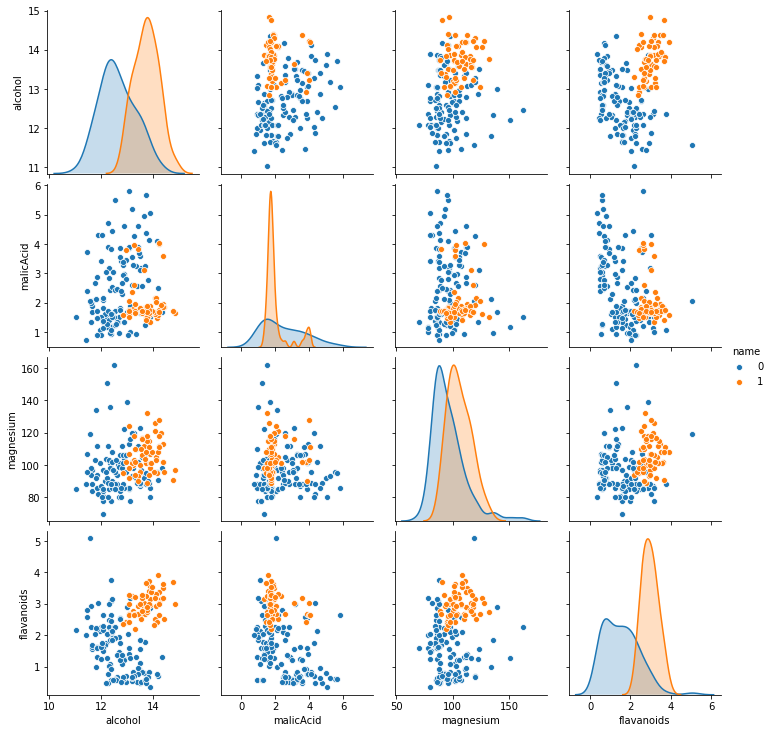

In [8]:
sns.pairplot(wineSub,hue='name')

**Visual checks of class separation**

Visually check how much the 2 candidate predictor variables separate wine class 1 from the others

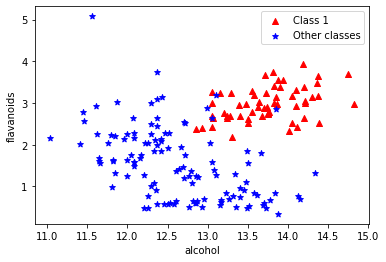

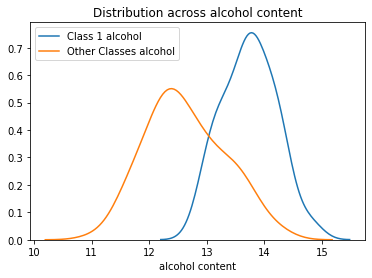

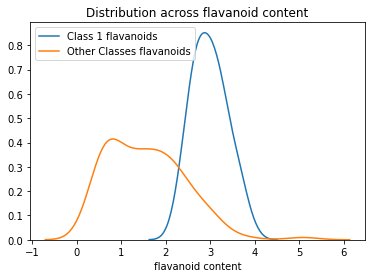

In [9]:
X = np.array(wineSub[['alcohol','flavanoids']])
y = np.array(wineSub['name'])

# Note DO NOT RESHAPE y TO HAVE MORE THAN 1 DIMENSION. OTHERWISE THE BELOW INDEXING WON'T WORK
# Are the classes separable? - Yes
plt.scatter(X[y == 1, 0],X[y == 1, 1],label='Class 1',marker='^',color='red')
plt.scatter(X[y == 0, 0],X[y == 0, 1],label='Other classes',marker='*',color='blue')
plt.xlabel('alcohol')
plt.ylabel('flavanoids')
plt.legend(loc='upper right')
plt.show()

sns.kdeplot(X[y == 1,0], label='Class 1 alcohol')
sns.kdeplot(X[y == 0,0], label='Other Classes alcohol')
plt.title('Distribution across alcohol content')
plt.xlabel('alcohol content')
plt.show()

sns.kdeplot(X[y == 1,1], label='Class 1 flavanoids')
sns.kdeplot(X[y == 0,1], label='Other Classes flavanoids')
plt.title('Distribution across flavanoid content')
plt.xlabel('flavanoid content')
plt.show()


**Training, Testing & Evaluation set-up**

Then split the data into training and test matrices. Train the models on the training matrices and evaluate them on the test matrices using the confusion matrix metrics

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [11]:
print(X_train.shape)
print(X_test.shape)

(106, 2)
(71, 2)


**Logistic Regression**

Run iterative checks on the parameters and penalty terms (L2 & L1) for logistic regression to see where accuracy and AUC peak

In [0]:
# Logistic Regression
# Using l2 penalty term
paramsl2, scoresl2, aucsl2 = [],[],[]
for c in range(-5,6):
    lr = LogisticRegression(C=10**c, penalty='l2')
    lr.fit(X_train,y_train)
    ypred = lr.predict(X_test)
    score = accuracy_score(y_test,ypred)
    fpr, tpr, thresholds = roc_curve(y_test,ypred)
    from sklearn.metrics import auc
    auc = auc(fpr,tpr)
    paramsl2.append(lr.C)
    scoresl2.append(score)
    aucsl2.append(auc)

# Using l1 penalty term
paramsl1, scoresl1, aucsl1 = [],[],[]
for c in range(-5,6):
    lr = LogisticRegression(C=10**c, penalty='l1')
    lr.fit(X_train,y_train)
    ypred = lr.predict(X_test)
    score = accuracy_score(y_test,ypred)
    fpr, tpr, thresholds = roc_curve(y_test,ypred)
    from sklearn.metrics import auc
    auc = auc(fpr,tpr)
    paramsl1.append(lr.C)
    scoresl1.append(score)
    aucsl1.append(auc)
    
plt.plot(paramsl2,scoresl2,linestyle='--',color='blue', label='l2')
plt.plot(paramsl1,scoresl1,linestyle='--',color='red', label='l1')
plt.legend(loc='lower right')
plt.xscale('log')
plt.xlabel('parameter values')
plt.ylabel('Accuracy')
plt.ylim(0.65,1.0)
plt.title('Accuracy scores across parameter values for l1 and l2 regularization')
plt.show()

plt.plot(paramsl2, aucsl2, linestyle='--',color='blue', label='l2')
plt.plot(paramsl1, aucsl1, linestyle='--',color='red', label='l1')
plt.legend(loc='lower right')
plt.xscale('log')
plt.xlabel('parameter values')
plt.ylabel("AUCs'")
plt.ylim(0.45,1.0)
plt.title('AUC values across parameter values for l1 and l2 regularization')
plt.show()

print("Smallest C parameter value for max l2 accuracy: %0.3f" % paramsl2[min([i for i, s in zip(count(), scoresl2) if s == max(scoresl2)])])
print("Max l2 accuracy: %0.3f" % max(scoresl2))
print("Smallest C parameter value for max l1 accuracy: %0.3f" % paramsl1[min([i for i, s in zip(count(), scoresl1) if s == max(scoresl1)])])
print("Max l1 accuracy: %0.3f" % max(scoresl1))

print("Smallest C parameter value for max l2 AUC: %0.3f" % paramsl2[min([i for i, s in zip(count(), aucsl2) if s == max(aucsl2)])])
print("Max l2 AUC: %0.3f" % max(aucsl2))
print("Smallest C parameter value for max l1 AUC: %0.3f" % paramsl1[min([i for i, s in zip(count(), aucsl1) if s == max(aucsl1)])])
print("Max l1 AUC: %0.3f" % max(aucsl1))

**Optimal Logistic Regression**

Train the model using the optimal parameter values on the training data set. Then plot the ROC curve and final evaluation metrics

**Verify model produces sensible outputs**

Check the distribution of probability values given to show the model is meaningful for the full range of input samples

In [0]:
# Optimal LR model hyperparamters; C=10 with l1 penalty
lr = LogisticRegression(C=10, penalty='l1')
lr.fit(X_train,y_train)
ypred = lr.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test,ypred, drop_intermediate=False)
from sklearn.metrics import auc
auc = auc(fpr,tpr)

# Plot ROC Curve
plt.plot(fpr,tpr, color='orange', lw=2, label='AUC : %0.3f' % auc)
plt.plot([0,1],[0,1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('Receiver Operator Curve')
plt.legend(loc='lower right')
plt.show()

**Verify model produces sensible outputs**

Check the distribution of probability values given to show the model is meaningful for the full range of input samples

**Cross Validation**

Cross validate the model to check variance of the model over different subsets of the sample space

In [0]:
# Plot the distrubtion of probability values
print('Model Coefficients: ', lr.coef_)
print('Model Intercept: ', lr.intercept_)
y_predProb = lr.predict_proba(X)
sns.distplot(y_predProb[1])
plt.xlim(0.00,1.00)
plt.title('Distribution of Probability values produced by Logistic Regression')
plt.show()

In [0]:
# Cross validating the results
kfold = KFold(n_splits=10, random_state=1)
cv_results = cross_val_score(lr, X, y, cv=kfold, scoring='accuracy')
sns.distplot(cv_results)
plt.title('Distribution of Accuracy scores')
print('Cross validated Accuracy: %.5f +/- %.5f' % (np.mean(cv_results), np.std(cv_results)))

**Model Evaluation Metrics**

Consult full list of model evaluation metrics

In [29]:
# Use several evaluation metrics for the model
print('Accuracy: %0.5f' % accuracy_score(y_test,ypred))
print('AUC: %0.5f' % auc)
print('Sensitivity: %0.5f' % sensitivity_score(y_test, ypred))
print('Specificity: %0.5f' % specificity_score(y_test, ypred))
print('Precision: %0.5f' % precision_score(y_test, ypred))

Accuracy: 0.92958
AUC: 0.89889
Sensitivity: 0.81818
Specificity: 0.97959
Precision: 0.94737


**Support Vector Machine**

Run iterative checks on the cost function parameters for tuning the support vector machine to see where accuracy peaks

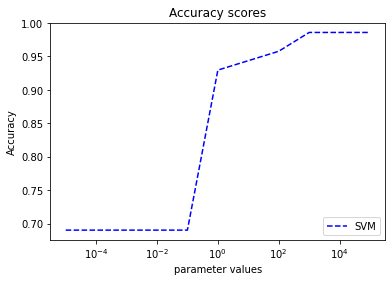

First Paramater value of max Accuracy: 1000.000
Max Accuracy: 0.986


In [28]:
# Using a SVM
# Varying the parameter C
params, scores = [],[]
for c in range(-5,6):
    svm = SVC(C=10**c)
    svm.fit(X_train,y_train)
    yPredsvm = svm.predict(X_test)
    score = accuracy_score(y_test,yPredsvm)
    params.append(svm.C)
    scores.append(score)
       
plt.plot(params,scores,linestyle='--',color='blue', label='SVM')
plt.legend(loc='lower right')
plt.xscale('log')
plt.xlabel('parameter values')
plt.ylabel('Accuracy')
plt.title('Accuracy scores')
plt.show()

print("First Paramater value of max Accuracy: %0.3f" % params[min([i for i, s in zip(count(),scores) if s == max(scores)])])
print("Max Accuracy: %0.3f" % max(scores))

**Optimal Support Vector Machine**

Train the model using the optimal parameter values on the training data set.

In [0]:
# Choose best performing SVM using C=1000 to maxmize accuracy
svm = SVC(C=1000)
svm.fit(X_train, y_train)
yPredsvm = svm.predict(X_test)

**Cross Validation**

Cross validate the model to check variance of the model over different subsets of the sample space

In [0]:
# Cross validate the SVM
kfold = KFold(n_splits=10, random_state=0)
cv_results = cross_val_score(svm, X, y, cv=kfold, scoring='accuracy')
print('Cross validated accuracy: %.5f +/- %.5f' % (np.mean(cv_results), np.std(cv_results)))

**Model Evaluation Metrics**

Consult full list of model evaluation metrics

In [15]:
# Use several evaluation metrics for the model
print('Accuracy: %0.5f' % accuracy_score(y_test,yPredsvm))
print('Sensitivity: %0.5f' % sensitivity_score(y_test, yPredsvm))
print('Specificity: %0.5f' % specificity_score(y_test, yPredsvm))
print('Precision: %0.5f' % precision_score(y_test, yPredsvm))

Accuracy: 0.98592
Sensitivity: 0.95455
Specificity: 1.00000
Precision: 1.00000


**Decision Tree - with Entropy**

Apply a decision tree classifier, using entropy as the function for the impurity measure at each node of the tree

In [16]:
# Using a Decision Tree
# With Entropy as the impurity measure
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
tree.fit(X_train, y_train)
yPredTree = tree.predict(X_test)
score = accuracy_score(y_test,yPredTree)

print("Test Accuracy: %0.5f" % score)

Test Accuracy: 0.95775


**Decision Tree - with Gini**

Apply a decision tree classifier, using Gini as the function for the impurity measure at each node of the tree

In [17]:
# Using a Decision Tree
# With Gini as the impurity measure
tree = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0)
tree.fit(X_train, y_train)
yPredTree = tree.predict(X_test)
score = accuracy_score(y_test,yPredTree)

print("Test Accuracy: %0.5f" % score)

Test Accuracy: 0.95775


**Final Decision Tree**

Run final decision tree on full data set using Gini as impurity measure. There was no discernible different between Gini and Entropy as impurity measures

In [0]:
# Using a Decision Tree
# With Gini as the impurity measure
tree = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0)
tree.fit(X_train, y_train)
yPredTree = tree.predict(X_test)

**Cross Validation**

Cross validate the model to check variance of the model over different subsets of the sample space

In [0]:
# Cross validate the Tree
kfold = KFold(n_splits=10, random_state=0)
cv_results = cross_val_score(tree, X, y, cv=kfold, scoring='accuracy')
print('Cross validated accuracy: %.5f +/- %.5f' % (np.mean(cv_results), np.std(cv_results)))

**Model Evaluation Metrics**

Consult full list of model evaluation metrics

In [20]:
# Use several evaluation metrics for the model
print('Accuracy: %0.5f' % accuracy_score(y_test,yPredTree))
print('Sensitivity: %0.5f' % sensitivity_score(y_test, yPredTree))
print('Specificity: %0.5f' % specificity_score(y_test, yPredTree))
print('Precision: %0.5f' % precision_score(y_test, yPredTree))

Accuracy: 0.95775
Sensitivity: 0.86364
Specificity: 1.00000
Precision: 1.00000


**AdaBoost Ensemble**

Apply the adaptive boosting ensemble method of weak learner decision trees

In [21]:
#Using AdaBoost ensemble
ada = AdaBoostClassifier(base_estimator=tree
                         ,n_estimators=500
                         ,learning_rate=0.1
                         ,random_state=1)
ada.fit(X_train, y_train)
yPredAda = ada.predict(X_test)

score = accuracy_score(y_test,yPredAda)

print("Test Accuracy: %0.5f" % score)

Test Accuracy: 0.95775


**Cross Validation**

Cross validate the model to check variance of the model over different subsets of the sample space

In [0]:
# Cross validate the Bag
kfold = KFold(n_splits=10, random_state=0)
cv_results = cross_val_score(ada, X, y, cv=kfold, scoring='accuracy')
print('Cross validated accuracy: %.5f +/- %.5f' % (np.mean(cv_results), np.std(cv_results)))

**Model Evaluation Metrics**

Consult full list of model evaluation metrics

In [23]:
# Use several evaluation metrics for the model
print('Accuracy: %0.5f' % accuracy_score(y_test,yPredAda))
print('Sensitivity: %0.5f' % sensitivity_score(y_test, yPredAda))
print('Specificity: %0.5f' % specificity_score(y_test, yPredAda))
print('Precision: %0.5f' % precision_score(y_test, yPredAda))

Accuracy: 0.95775
Sensitivity: 0.86364
Specificity: 1.00000
Precision: 1.00000


**Multi-Layer Perceptron**

Implement this neural network with the hidden layer architecture set to (50,25,10,5). This is already pre-trained so I can simply iterate through different values of the alpha parameter which sets the impact of the L2 regularization term in the cost function to be minimized

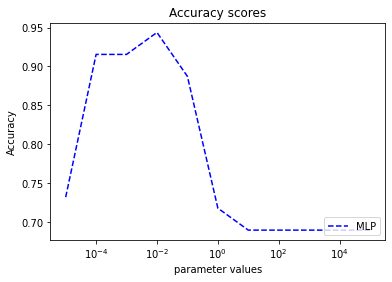

First Paramater value of max Accuracy: 0.01000
Max Accuracy: 0.94366


In [24]:
# Using a Multi-layer perceptron
# Testing multiple values of alpha
params, scores = [],[]
for a in range(-5,6):
    mlp = MLPClassifier(solver='lbfgs'
                    , activation = 'relu'
                    , alpha=10**a
                    , hidden_layer_sizes=(50,25,10,5)
                    , random_state=1)
    mlp.fit(X_train, y_train)
    yPredMLP = mlp.predict(X_test)
    score = accuracy_score(y_test,yPredMLP)
    params.append(mlp.alpha)
    scores.append(score)
        
plt.plot(params,scores,linestyle='--',color='blue', label='MLP')
plt.legend(loc='lower right')
plt.xscale('log')
plt.xlabel('parameter values')
plt.ylabel('Accuracy')
plt.title('Accuracy scores')
plt.show()

print("First Paramater value of max Accuracy: %0.5f" % params[min([i for i, s in zip(count(),scores) if s == max(scores)])])
print("Max Accuracy: %0.5f" % max(scores))

**Cross Validation of the Optimal model**

Cross validate the model to check variance of the model over different subsets of the sample space having built it on the training data set

In [0]:
# Cross Validate the best performing network
mlp = MLPClassifier(solver='lbfgs'
                    ,activation = 'relu'
                    ,alpha=10**-5
                    ,hidden_layer_sizes=(50,25,10,5)
                    ,random_state=1)
mlp.fit(X_train, y_train)
yPredMLP = mlp.predict(X_test)

**Cross Validation**

Cross validate the model to check variance of the model over different subsets of the sample space

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Cross validated accuracy: 0.76667 +/- 0.29586


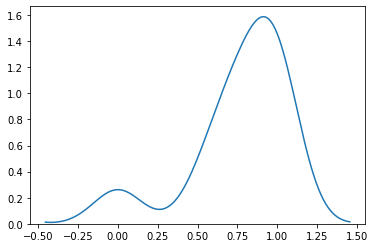

In [26]:
kfold = KFold(n_splits=10, random_state=1)
cv_results = cross_val_score(mlp, X , y, cv=kfold ,scoring='accuracy')
sns.kdeplot(cv_results)
print('Cross validated accuracy: %.5f +/- %.5f' % (np.mean(cv_results), np.std(cv_results)))

**Model Evaluation Metrics**

Consult full list of model evaluation metrics

In [27]:
# Use several evaluation metrics for the model
print('Accuracy: %0.5f' % accuracy_score(y_test,yPredMLP))
print('Sensitivity: %0.5f' % sensitivity_score(y_test, yPredMLP))
print('Specificity: %0.5f' % specificity_score(y_test, yPredMLP))
print('Precision: %0.5f' % precision_score(y_test, yPredMLP))

Accuracy: 0.73239
Sensitivity: 0.13636
Specificity: 1.00000
Precision: 1.00000
